# Data Processing``

### Importing required tools 

In [2]:
from os import path, listdir
from IPython.display import display as disp
import numpy as np 
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

### Data Processing Steps 

1. Raw Data Collection 
2. Raw Data Correction
3. Intermediate Data : Box information(Bx,By,Bh,Bw)
4. Classes Encoding(sign : 1, others : 0 ||  amount : 1, others : 0)
5. Data Orientation(4*(1+4+4)=36 +1 = 37 column)
6. Data Normalisation

In [3]:
# # Raw Data Extraction tool 
# from collection_and_process.dataCollector import extract_data_in_loop

### Raw Data Correction

|X|Y|
|------|------|
|Ax=Dx | Ay=By|
|Bx=Cx | Cy=Dy|

In [4]:
raw_data_path = "./csv/"
df_list = [pd.read_csv(path.join(raw_data_path,file)) for file in listdir(raw_data_path)]
raw_df=pd.concat(df_list, ignore_index=True)
raw_df.head(10)

,FileName,IMG_HEIGHT,IMG_WIDTH,ClassName,P,Ax,Ay,Bx,By,Cx,Cy,Dx,Dy
0,X_000.jpeg,930,2240,Signature,1,1290.0,648.0,2030.0,660.0,2042.0,840.0,1302.0,849.0
1,X_000.jpeg,930,2240,Date,1,1433.0,227.0,1755.0,226.0,1755.0,294.0,1426.0,294.0
2,X_000.jpeg,930,2240,Amount,1,1785.0,339.0,2072.0,338.0,2074.0,408.0,1783.0,408.0
3,X_000.jpeg,930,2240,AcNo,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,X_001.jpeg,853,2240,Signature,1,1477.0,529.0,2149.0,534.0,2163.0,771.0,1486.0,768.0
5,X_001.jpeg,853,2240,Date,1,1757.0,183.0,1955.0,182.0,1955.0,229.0,1757.0,234.0
6,X_001.jpeg,853,2240,Amount,1,1946.0,400.0,2177.0,404.0,2182.0,452.0,1946.0,453.0
7,X_001.jpeg,853,2240,AcNo,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,X_002.jpeg,823,2240,Signature,1,1444.0,511.0,1892.0,512.0,1895.0,674.0,1433.0,677.0
9,X_002.jpeg,823,2240,Date,1,1335.0,210.0,1825.0,210.0,1822.0,262.0,1332.0,268.0


In [5]:
corrected_df = raw_df.iloc[:,:5]
corrected_df['Ax'] = (raw_df.Ax+raw_df.Dx)/2
corrected_df['Ay'] = (raw_df.By+raw_df.Ay)/2
corrected_df['Cx'] = (raw_df.Bx+raw_df.Cx)/2
corrected_df['Cy'] = (raw_df.Cy+raw_df.Dy)/2

corrected_df.head()

,FileName,IMG_HEIGHT,IMG_WIDTH,ClassName,P,Ax,Ay,Cx,Cy
0,X_000.jpeg,930,2240,Signature,1,1296.0,654.0,2036.0,844.5
1,X_000.jpeg,930,2240,Date,1,1429.5,226.5,1755.0,294.0
2,X_000.jpeg,930,2240,Amount,1,1784.0,338.5,2073.0,408.0
3,X_000.jpeg,930,2240,AcNo,0,-1.0,-1.0,-1.0,-1.0
4,X_001.jpeg,853,2240,Signature,1,1481.5,531.5,2156.0,769.5


### Box Information Data generation

In [6]:
intermediate_df = corrected_df.iloc[:,:5]
Cx,Ax,Cy,Ay = corrected_df.Cx, corrected_df.Ax, corrected_df.Cy, corrected_df.Ay
intermediate_df['Bx'] = (Cx+Ax)/2 # Simplyfing Ax+(Cx-Ax)/2
intermediate_df['By'] = (Cy+Ay)/2 # Simplyfing Ay+(Cy-Ay)/2
intermediate_df['Bw'] = np.abs(Cx-Ax)
intermediate_df['Bh'] = np.abs(Cy-Ay)

intermediate_df.head(10)

,FileName,IMG_HEIGHT,IMG_WIDTH,ClassName,P,Bx,By,Bw,Bh
0,X_000.jpeg,930,2240,Signature,1,1666.00,749.25,740.0,190.5
1,X_000.jpeg,930,2240,Date,1,1592.25,260.25,325.5,67.5
2,X_000.jpeg,930,2240,Amount,1,1928.50,373.25,289.0,69.5
3,X_000.jpeg,930,2240,AcNo,0,-1.00,-1.00,0.0,0.0
4,X_001.jpeg,853,2240,Signature,1,1818.75,650.50,674.5,238.0
5,X_001.jpeg,853,2240,Date,1,1856.00,207.00,198.0,49.0
6,X_001.jpeg,853,2240,Amount,1,2062.75,427.25,233.5,50.5
7,X_001.jpeg,853,2240,AcNo,0,-1.00,-1.00,0.0,0.0
8,X_002.jpeg,823,2240,Signature,1,1666.00,593.50,455.0,164.0
9,X_002.jpeg,823,2240,Date,1,1578.50,237.50,490.0,55.0


(823, 2240, 3)

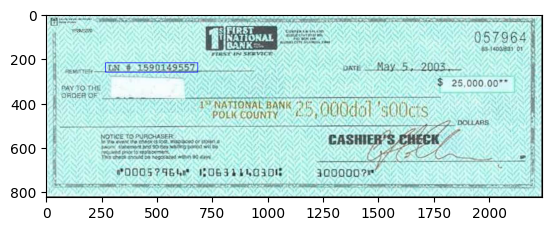

In [7]:
image_dir="./X/"
index = 11
img = cv.imread(path.join(image_dir,intermediate_df.FileName[index]))
bx,by,bw,bh = intermediate_df.iloc[index,5:]
cv.rectangle(img,(int(bx-bw/2),int(by-bh/2)),(int(bx+bw/2),int(by+bh/2)) ,(0,0,255),2)
plt.imshow(img)
img.shape

### Classes Encoding 

In [8]:
class_encoded_df=pd.get_dummies(intermediate_df,columns=["ClassName"],prefix="",prefix_sep='')
class_encoded_df.head(10)

,FileName,IMG_HEIGHT,IMG_WIDTH,P,Bx,By,Bw,Bh,AcNo,Amount,Date,Signature
0,X_000.jpeg,930,2240,1,1666.00,749.25,740.0,190.5,False,False,False,True
1,X_000.jpeg,930,2240,1,1592.25,260.25,325.5,67.5,False,False,True,False
2,X_000.jpeg,930,2240,1,1928.50,373.25,289.0,69.5,False,True,False,False
3,X_000.jpeg,930,2240,0,-1.00,-1.00,0.0,0.0,True,False,False,False
4,X_001.jpeg,853,2240,1,1818.75,650.50,674.5,238.0,False,False,False,True
5,X_001.jpeg,853,2240,1,1856.00,207.00,198.0,49.0,False,False,True,False
6,X_001.jpeg,853,2240,1,2062.75,427.25,233.5,50.5,False,True,False,False
7,X_001.jpeg,853,2240,0,-1.00,-1.00,0.0,0.0,True,False,False,False
8,X_002.jpeg,823,2240,1,1666.00,593.50,455.0,164.0,False,False,False,True
9,X_002.jpeg,823,2240,1,1578.50,237.50,490.0,55.0,False,False,True,False


### Data Scaling

### Reshape Image and Y Data Modification 

In [9]:
SCALE_FACTOR = .8

In [10]:
image_height =  class_encoded_df.IMG_HEIGHT.mean() * SCALE_FACTOR
image_width = class_encoded_df.IMG_WIDTH.mean() * SCALE_FACTOR
image_shape = (int(image_height),int(image_width),3)
image_shape

(775, 1792, 3)

In [11]:
def scalling_Y_data(df):
    df.By = (df.IMG_HEIGHT/image_height)**-1 * df.By  
    df.Bh = (df.IMG_HEIGHT/image_height)**-1 * df.Bh  
    df.Bx = (df.IMG_WIDTH/image_width)**-1 * df.Bx  
    df.Bw = (df.IMG_WIDTH/image_width)**-1 * df.Bw
    return df
Y_scaled_data = scalling_Y_data(class_encoded_df)

In [12]:
disp(Y_scaled_data[Y_scaled_data.By>999999999999999999])
disp(Y_scaled_data[Y_scaled_data.Bx>999999999999999999])

,FileName,IMG_HEIGHT,IMG_WIDTH,P,Bx,By,Bw,Bh,AcNo,Amount,Date,Signature


,FileName,IMG_HEIGHT,IMG_WIDTH,P,Bx,By,Bw,Bh,AcNo,Amount,Date,Signature


In [13]:
normalaized_df = Y_scaled_data

### Data Orientation Related to 4 objects 

In [14]:
previous_columns = normalaized_df.columns[:3]
columns = list(previous_columns)+[f"obj{j}_{i}" for j in range(4) for i in normalaized_df.columns[3:] ]
disp(len(columns))
oriented_df=pd.DataFrame(columns=columns)
for i,name in enumerate(normalaized_df.FileName.unique()): 
    
    data_prefix = list(normalaized_df[normalaized_df.FileName==name].iloc[0,:3])
   
    data_suffix = list(np.array(
        normalaized_df[normalaized_df.FileName == name].iloc[:,3:]
    ).reshape(-1))
    oriented_df.loc[i]=(data_prefix+data_suffix)
df = oriented_df
df.head()

39

,FileName,IMG_HEIGHT,IMG_WIDTH,obj0_P,obj0_Bx,obj0_By,obj0_Bw,obj0_Bh,obj0_AcNo,obj0_Amount,...,obj2_Signature,obj3_P,obj3_Bx,obj3_By,obj3_Bw,obj3_Bh,obj3_AcNo,obj3_Amount,obj3_Date,obj3_Signature
0,X_000.jpeg,930,2240,1,1332.8,624.932754,592.0,158.891811,False,False,...,False,0,-0.8,-0.834078,0.0,0.000000,True,False,False,False
1,X_001.jpeg,853,2240,1,1455.0,591.544954,539.6,216.429976,False,False,...,False,0,-0.8,-0.909370,0.0,0.000000,True,False,False,False
2,X_002.jpeg,823,2240,1,1332.8,559.384428,364.0,154.572951,False,False,...,False,1,381.2,226.439948,333.6,40.057015,True,False,False,False
3,X_003.jpeg,978,2240,1,1428.6,545.483011,525.2,164.576844,False,False,...,False,1,279.0,541.715589,158.8,42.829637,True,False,False,False
4,X_004.jpeg,956,2240,1,1357.4,569.192630,534.8,124.143225,False,False,...,False,0,-0.8,-0.811394,0.0,0.000000,True,False,False,False


# Data Loading and Advanced Processing 

### Image Processing Steps

### Loading Image and scaling according scale factor  

In [15]:
def read_and_resize_image(filename):
    
    image_dir="./X/"
    img = cv.imread(path.join(image_dir,filename),cv.COLOR_BGR2RGB)
    img = cv.resize(img,tuple(reversed(image_shape[:2])))
    # other filter functions applied on img
    if len(img.shape)<3:
        img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)

        # raise BaseException("Shape Error on file : "+filename)
    return img
read_and_resize_image('X_000.jpeg').shape

(775, 1792, 3)

### Dataframe to Array 

In [16]:
df['Image'] = df['FileName'].apply(read_and_resize_image)
df['Image'].head()


0    [[[72, 72, 72], [71, 71, 71], [70, 70, 70], [7...
1    [[[13, 6, 11], [10, 3, 8], [9, 3, 8], [10, 3, ...
2    [[[18, 13, 14], [8, 3, 4], [5, 1, 1], [4, 2, 2...
3    [[[14, 4, 4], [13, 3, 3], [14, 4, 4], [14, 6, ...
4    [[[21, 26, 25], [5, 7, 6], [9, 14, 13], [1, 2,...
Name: Image, dtype: object

In [17]:
X = df["Image"]
Y = df.iloc[:,3:].drop("Image",axis=1)
disp(Y.columns)
disp(X.values.shape,Y.values.shape)
X = np.stack(X.values)
Y = np.stack(Y.values)
Y = np.array(Y,dtype=np.float64)
X = np.array(X, dtype=np.float64)
X.shape,Y.shape

Index(['obj0_P', 'obj0_Bx', 'obj0_By', 'obj0_Bw', 'obj0_Bh', 'obj0_AcNo',
       'obj0_Amount', 'obj0_Date', 'obj0_Signature', 'obj1_P', 'obj1_Bx',
       'obj1_By', 'obj1_Bw', 'obj1_Bh', 'obj1_AcNo', 'obj1_Amount',
       'obj1_Date', 'obj1_Signature', 'obj2_P', 'obj2_Bx', 'obj2_By',
       'obj2_Bw', 'obj2_Bh', 'obj2_AcNo', 'obj2_Amount', 'obj2_Date',
       'obj2_Signature', 'obj3_P', 'obj3_Bx', 'obj3_By', 'obj3_Bw', 'obj3_Bh',
       'obj3_AcNo', 'obj3_Amount', 'obj3_Date', 'obj3_Signature'],
      dtype='object')

(39,)

(39, 36)

((39, 775, 1792, 3), (39, 36))

In [18]:
import tensorflow as tf

### Tensor Flow Data Load

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
x,y = dataset.as_numpy_iterator().__next__()
x.shape,y.shape

((775, 1792, 3), (36,))

In [20]:
TRAIN_SIZE_IN_1 = 0.8
total_samples = len(dataset)
train_size = int(total_samples * TRAIN_SIZE_IN_1)
dataset = dataset.shuffle(total_samples)
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [21]:
for x,y in train_dataset :
    print(x.shape)
    print(y.shape)
    break

(775, 1792, 3)
(36,)


### Generating Model 


In [22]:
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [24]:
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=image_shape),
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding = 'same' ,activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(36),

])

ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[5533696,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:AddV2]

In [ ]:
model.summary()

In [ ]:
lr = 0.001
batch_size = 8
epoch = 50

In [ ]:

model.compile(optimizer=Adam(learning_rate=lr), 
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])



NameError: name 'model' is not defined

In [ ]:
# Train the model
model.fit(train_dataset, epochs=epoch,
          validation_data=val_dataset, batch_size=batch_size)
